In [2]:
import numpy as np
import pandas as pd
from keras.layers import Dense,Dropout
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
import matplotlib.pyplot as plt
import math
import csv

In [3]:
u=[]
z=[]
t1=np.arange(0,180.1,1)
t2=np.arange(0,180.1,1)
for i in t1:
  for j in t2:
    x=50*math.cos(math.radians(i))+40*math.cos(math.radians(i+j))
    y=50*math.sin(math.radians(i))+40*math.sin(math.radians(i+j))
    z.append(np.array((i,j,x,y)))
  u.extend(z)
#print(u)

In [6]:
header = ['anpha', 'beta', 'x', 'y']
with open('robot_2b.csv', 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(u)

In [5]:
data = pd.read_csv('robot_2b.csv')
data.shape
numpy_dataset = data.values
y=numpy_dataset[:,:2]/180.0
x=(numpy_dataset[:,2:]+90)/180.0
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [7]:
print("Original data is:",x_train)
print("Shape of data is: ",x_train.shape)
print("Original data is:",y_train)
print("Shape of data is: ",y_train.shape)

Original data is: [[0.45668721 0.56614084]
 [0.54827408 0.53501176]
 [0.3228082  0.87063592]
 ...
 [0.56329378 0.74280066]
 [0.10970177 0.57850775]
 [0.48847072 0.7616311 ]]
Shape of data is:  (2385000, 2)
Original data is: [[0.46666667 0.92777778]
 [0.09444444 0.97222222]
 [0.47222222 0.38888889]
 ...
 [0.14444444 0.67222222]
 [0.75555556 0.41666667]
 [0.24444444 0.65555556]]
Shape of data is:  (2385000, 2)


In [8]:
model = Sequential() 
model.add(Dense(128, activation='relu', input_shape = (2,))) 
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2))
model.summary()
model.compile(loss='mae', optimizer =Adam(), metrics=['acc'])
history = model.fit(x_train, y_train, batch_size = 32, epochs = 5, validation_split = 0.2)
score=model.evaluate(x_test,y_test,verbose=0)
print('sai so kiem tra la',score[0])
print('do chinh xac kiem tra',score[1]*100)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 2)                 66        
                                                                 
Total params: 10,786
Trainable params: 10,786
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
59625/59625 [==============================] - 145s 2ms/step - loss: 0.0097 - acc: 0.9802 - val_loss: 0.0072 - val_acc: 0.9857
Epoch 2/5
59625/59625 [========================

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


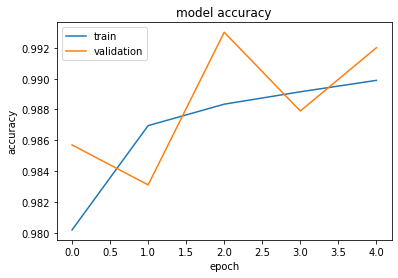

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper_left')
plt.show()

In [11]:
Px_test_train = (0+90)/180.0
Py_test_train = (90+90)/180.0
print(Px_test_train,Py_test_train)
test = model.predict([[Px_test_train,Py_test_train]])
t1 = test[0][0]*180
t2 = test[0][1]*180
x_1=50*math.cos(math.radians(t1))+40*math.cos(math.radians(t1+t2))
y_1=50*math.sin(math.radians(t1))+40*math.sin(math.radians(t1+t2))
print('x = ',x_1,'y = ',y_1)
print(t1,t2)

0.5 1.0
x =  -0.24620624975374383 y =  89.89368243446066
87.66992211341858 5.596305727958679
